In [ ]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
#!pip list

**Introducción** \\
Este estudio se centra en el desarrollo de una red neuronal profunda diseñada para la detección de tres categorías de animales: gatos, perros y vida salvaje. La importancia de este problema radica en la capacidad de mejorar y automatizar la identificación de animales en diversas situaciones, lo que tiene implicaciones directas en varios ámbitos.

En primer lugar, la identificación precisa de mascotas como gatos y perros puede tener un impacto significativo en su seguridad y bienestar. Con la creciente preocupación por el extravío de mascotas, una herramienta eficaz de detección puede facilitar la rápida reunión de mascotas perdidas con sus dueños, mejorando así la calidad de vida tanto para los animales como para sus cuidadores.

En segundo lugar, la detección de vida salvaje es fundamental para la conservación y monitoreo de especies en peligro de extinción. La capacidad de identificar automáticamente animales en entornos naturales permite a los investigadores y conservacionistas realizar un seguimiento más efectivo de las poblaciones, evaluar los patrones de migración y comprender mejor el comportamiento de las especies en su hábitat natural.

En resumen, este proyecto no solo aborda el desafío técnico de la detección de animales en imágenes, sino que también tiene aplicaciones prácticas y éticas que pueden mejorar la vida de animales domésticos y contribuir a la conservación de especies en peligro. La implementación exitosa de esta red neuronal profunda podría tener un impacto positivo en campos tan diversos como la seguridad de mascotas, la conservación de la vida silvestre y la investigación científica.

Debido a esto, se seleccionó un dataset con imágenes de gatos, perros y animales 'salvajes' tales como leones, leopardos, entre otros. En total se cuenta con 14,631 imágenes, que se dividen en 5,153 de gatos, 4,739 de perros y 4,738 de fauna salvaje.

In [ ]:
import os
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import numpy as np

# Ruta de la carpeta de imágenes
ruta_imagenes = r"C:\Users\Jared.Flores\OneDrive - DIRECTO TELECOM S.A. DE C.V\Jared\ITESM\IA clase\IA2\train\set"

# Ruta del archivo CSV
ruta_csv = r"C:\Users\Jared.Flores\OneDrive - DIRECTO TELECOM S.A. DE C.V\Jared\ITESM\IA clase\IA2\etiquetas.csv"


# Leer el archivo CSV
df = pd.read_csv(ruta_csv)

# Crear listas para almacenar las imágenes y etiquetas
imagenes = []
etiquetas = []

# Iterar sobre las filas del DataFrame
for index, fila in df.iterrows():
    # Construir la ruta completa de la imagen
    ruta_imagen = os.path.join(ruta_imagenes, fila['Ruta'] + '.jpg')
    #print(ruta_imagen)

    # Leer la imagen usando OpenCV
    imagen = cv2.imread(ruta_imagen)

    # Puedes necesitar redimensionar la imagen según tus necesidades
    imagen = cv2.resize(imagen, (64, 64))

    # Normalizar la imagen dividiendo por 255
    imagen = imagen / 255.0

    # Agregar la imagen y la etiqueta a las listas
    imagenes.append(imagen)
    etiquetas.append(fila['Etiqueta'])

# Convertir las listas a arrays numpy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.30, random_state=42)



En esta primera parte se cargan las imagenes con su respectiva etiqueta. El único procesamiento que se aplica es redimensionar las imagenes a 64x64 y normalizarlas. \\
Así mismo, se dividieron los datos en 70% entrenamiento y 30% de prueba.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.metrics import MeanAbsoluteError
import numpy as np

# Suponiendo que ya tienes X_train, X_test, y_train, y_test del código anterior

# Convertir etiquetas de texto a números enteros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Definir la arquitectura de la red neuronal
model = models.Sequential()

# Primera capa convolucional y max pooling
model.add(layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional y max pooling
model.add(layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional y max pooling
model.add(layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Cuarta capa convolucional y max pooling
model.add(layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar la salida antes de conectarla a una capa densa
model.add(layers.Flatten())

# Capa de salida con activación elu
model.add(layers.Dense(3, activation='elu'))


# Compilar el modelo
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=[SparseCategoricalAccuracy(), MeanAbsoluteError()])

#tf.keras.optimizers.Adam(learning_rate=0.1)


# Entrenar el modelo
history = model.fit(X_train, y_train_encoded, epochs=15, validation_data=(X_test, y_test_encoded))

# Evaluar el modelo
test_loss, test_acc, test_mae = model.evaluate(X_test, y_test_encoded)
print(f'Precisión en el conjunto de prueba: {test_acc}')
print(f'MAE en el conjunto de prueba: {test_mae}')

Epoch 1/15
321/321 [==============================] - 73s 222ms/step - loss: 1.1032 - sparse_categorical_accuracy: 0.3240 - mean_absolute_error: 1.9181 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.3242 - val_mean_absolute_error: 1.9120
Epoch 2/15
321/321 [==============================] - 70s 218ms/step - loss: 1.0986 - sparse_categorical_accuracy: 0.3238 - mean_absolute_error: 1.9209 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.3242 - val_mean_absolute_error: 1.9120
Epoch 3/15
321/321 [==============================] - 70s 218ms/step - loss: 1.0986 - sparse_categorical_accuracy: 0.3238 - mean_absolute_error: 1.9209 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.3242 - val_mean_absolute_error: 1.9120
Epoch 4/15
321/321 [==============================] - 71s 220ms/step - loss: 1.0986 - sparse_categorical_accuracy: 0.3238 - mean_absolute_error: 1.9209 - val_loss: 1.0986 - val_sparse_categorical_accuracy: 0.3242 - val_mean_absolute_error: 1.9120
Epoch 5/15
3

La construcción del modelo está conformada por una capa de entrada convolucional con 32 filtros, un kernel de 3x3, función de activación ReLU y relleno 'same' para mantener las dimensiones. Se requieren imagenes de 64x64 y a color. \\
De igual manera se emplean capaz intermedias convolucionadas, de kernel 3x3 y activación ReLU, pero con 64, 128 y 256 filtros. Por otro lado, es importante mencionar que después de cada capa convolucional se utiliza una capa Maxpooling de 2x2 para reducir dimensiones espaciales.

Despues la salida de la última capa Maxpooling, se aplana para entrar a una capa densa. \\
Por último, se emplea una capa densa de salida, de 3 filtros (correspondientes a las etiquetas objetivo) y una función de activación eLU.

Continuando, para la compilación se utiliza el optimizador SGD (descenso de gradiente estocástico), la función de pérdida 'sparse_categorical_crossentropy' (adecuada para clasificación con etiquetas enteras) y las métricas de error absoluto medio (MAE) y precisión categórica escasa (SparseCategoricalAccuracy).

La evaluación del modelo se hace con la precisión y el error absoluto medio.

In [ ]:
df = pd.DataFrame(history.history)

<Axes: title={'center': 'Loss vs Epoch'}>

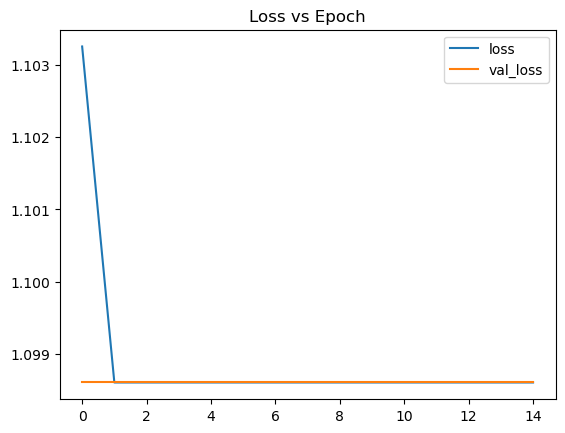

In [ ]:
# Make a plot for the loss
df.plot(y=["loss", "val_loss"], title="Loss vs Epoch")

<Axes: title={'center': 'sparse_categorical_accuracy vs Epoch'}>

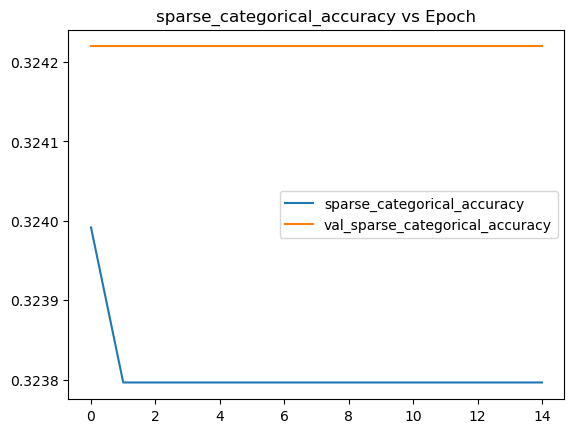

In [ ]:
# Make a plot for the accuracy
df.plot(y=["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"], title="sparse_categorical_accuracy vs Epoch")

En estas 2 gráficas se observa el desempeño de la precisión categórica escasa tanto en el entrenamiento como en el de validación durante 15 épocas. Además de la pérdida de cada época.

Si bien, los resultados son bastante deficientes, por lo que se busca generar un modelo con mejor desempeño.

In [ ]:
# Definir la arquitectura de la red neuronal
model2 = models.Sequential()

# Primera capa convolucional y max pooling
model2.add(layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(64, 64, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional y max pooling
model2.add(layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional y max pooling
model2.add(layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

# Cuarta capa convolucional y max pooling
model2.add(layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

# Aplanar la salida antes de conectarla a una capa densa
model2.add(layers.Flatten())

# Capa densa con activación relu y dropout
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dropout(0.5))    #ACTIVAR

# Capa de salida con activación softmax para clasificación
model2.add(layers.Dense(3, activation='softmax'))

# Compilar el modelo
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #DISMINUIR EL LEARNING A .001
              loss='sparse_categorical_crossentropy',
              metrics=[SparseCategoricalAccuracy(), MeanAbsoluteError()])




# Entrenar el modelo
history2 = model2.fit(X_train, y_train_encoded, epochs=10, validation_data=(X_test, y_test_encoded))

# Evaluar el modelo
test_loss, test_acc, test_mae = model2.evaluate(X_test, y_test_encoded)
print(f'Precisión en el conjunto de prueba: {test_acc}')
print(f'Mae en el conjunto de prueba: {test_mae}')

Epoch 1/10
321/321 [==============================] - 48s 146ms/step - loss: 0.5360 - sparse_categorical_accuracy: 0.7654 - mean_absolute_error: 0.8749 - val_loss: 0.2234 - val_sparse_categorical_accuracy: 0.9162 - val_mean_absolute_error: 0.8688
Epoch 2/10
321/321 [==============================] - 45s 140ms/step - loss: 0.2068 - sparse_categorical_accuracy: 0.9257 - mean_absolute_error: 0.8749 - val_loss: 0.2501 - val_sparse_categorical_accuracy: 0.9070 - val_mean_absolute_error: 0.8688
Epoch 3/10
321/321 [==============================] - 46s 143ms/step - loss: 0.1277 - sparse_categorical_accuracy: 0.9537 - mean_absolute_error: 0.8749 - val_loss: 0.1610 - val_sparse_categorical_accuracy: 0.9435 - val_mean_absolute_error: 0.8688
Epoch 4/10
321/321 [==============================] - 48s 148ms/step - loss: 0.0924 - sparse_categorical_accuracy: 0.9664 - mean_absolute_error: 0.8749 - val_loss: 0.1660 - val_sparse_categorical_accuracy: 0.9373 - val_mean_absolute_error: 0.8688
Epoch 5/10
3

Tomando como base el primer modelo, se hicieron algunos cambios para lograr mejores resultados.

Se agregó una capa después del aplanamiento, la cual es convolucionada, con 512 filtros, kernel 3x3 y una activación ReLU. Además se utilizó Dropout (.5) para evitar el sobreajuste. También, se modificó la función de activación para la capa densa de salida a softmax, la cual es mejor para problemas de clasificación multiclase, pues cada valor de salida representa la probabilidad de que la entrada pertenezca a una clase particular.

Por otro lado, se cambió el optimizador SGD a Adam con un learning rate de .001, el cual emplea una regularización L2, suaviza la convergencia y acelera el entrenamiento, además de ser menos sensible a los pesos iniciales.

In [ ]:
df2 = pd.DataFrame(history2.history)

<Axes: title={'center': 'Loss vs Epoch'}>

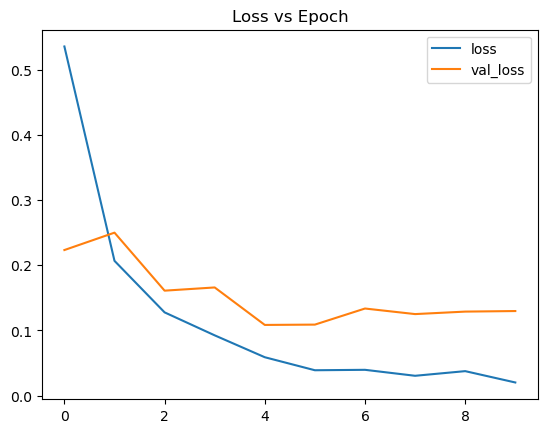

In [ ]:
# Make a plot for the loss
df2.plot(y=["loss", "val_loss"], title="Loss vs Epoch")

<Axes: title={'center': 'sparse_categorical_accuracy vs Epoch'}>

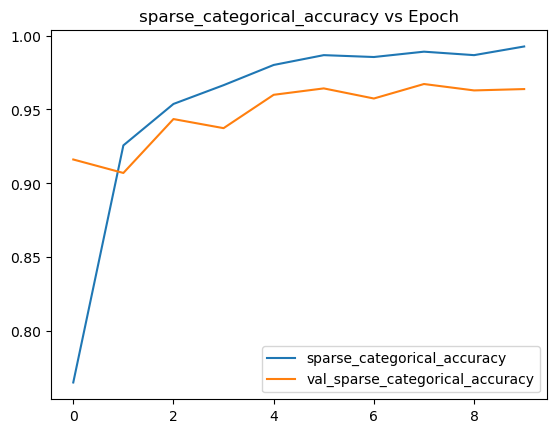

In [ ]:
# Make a plot for the accuracy
df2.plot(y=["sparse_categorical_accuracy", "val_sparse_categorical_accuracy"], title="sparse_categorical_accuracy vs Epoch")

# **Resultados y conclusiones**

1/1 [==============================] - 0s 36ms/step


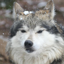

Imagen: flickr_wild_000527.jpg, Predicción: ['dog']
1/1 [==============================] - 0s 22ms/step


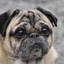

Imagen: flickr_dog_000079.jpg, Predicción: ['dog']
1/1 [==============================] - 0s 26ms/step


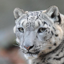

Imagen: flickr_wild_000432.jpg, Predicción: ['wild']
1/1 [==============================] - 0s 26ms/step


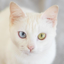

Imagen: flickr_cat_000016.jpg, Predicción: ['cat']
1/1 [==============================] - 0s 22ms/step


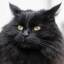

Imagen: flickr_cat_000096.jpg, Predicción: ['cat']


In [ ]:
import os
import random
from PIL import Image
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Ruta de la carpeta que contiene las imágenes
carpeta_imagenes = r'C:\Users\Jared.Flores\OneDrive - DIRECTO TELECOM S.A. DE C.V\Jared\ITESM\IA clase\IA2\train\pruebas'

# Obtén la lista de archivos en la carpeta de imágenes
lista_imagenes = os.listdir(carpeta_imagenes)

# Selecciona 5 imágenes al azar de la lista
imagenes_seleccionadas = random.sample(lista_imagenes, 5)

# Crear el objeto LabelEncoder y ajustar a las etiquetas de entrenamiento
label_encoder = LabelEncoder()
y_train = ['cat','dog','wild']  # Las etiquetas de entrenamiento
y_train_encoded = label_encoder.fit_transform(y_train)

for imagen_seleccionada in imagenes_seleccionadas:
    # Ruta completa de la imagen seleccionada
    ruta_imagen_seleccionada = os.path.join(carpeta_imagenes, imagen_seleccionada)

    # Carga y preprocesa la imagen
    imag = Image.open(ruta_imagen_seleccionada)

    # Redimensionar la imagen a (64, 64)
    imag = imag.resize((64, 64))

    # Convierte la imagen a un array y realiza la predicción
    imagen_array = np.array(imag)
    imagen_array = np.expand_dims(imagen_array, axis=0)
    resultado_prediccion = model2.predict(imagen_array)

    # Obtén la etiqueta predicha
    predicted_label = np.argmax(resultado_prediccion, axis=1)

    # Usa inverse_transform para obtener la etiqueta original
    decoded_label = label_encoder.inverse_transform(predicted_label)

    # Muestra la imagen y la predicción
    display(imag)
    print(f'Imagen: {imagen_seleccionada}, Predicción: {decoded_label}')




Con las mejoras implementadas en el segundo modelo, se obtuvieron mejores resultados, pues se logró una precisión de .96 en el conjunto de prueba a comparación del .32 del primer modelo. Así mismo se obtuvo un menor error absoluto medio (.86). De igual manera en las gráficas de error y de precisión categórica se puede observar una mejoría con cada época, pues son curvas más suaves y muy cercanas entre el conjunto de entrenamiento y de validación.

Por último, en las predicciones de prueba se tiene que se equivocó en la primer imágen, en la que es un animal salvaje y el modelo le asignó una etiqueta de perro. Sin embargo, en las siguientes 4 imágenes se identificó correctamente el tipo de animal.

En general se obtuvieron buenos resultados con las modificaciones, pero se pueden mejorar agregando más capaz intermedias y aumentando la base de datos, pues se llega a confundir cuando se tienen animales como lobos y linces, pues tienen mayor parecido a los gatos/perros respectivamente. Aunado a esto, se podrían emplear más épocas en el segundo modelo.